In [84]:
import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py"
    import helper
    #!pip install casadi
    helper.install_idaes()
    helper.install_ipopt()

--2023-12-15 10:07:01--  https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7171 (7.0K) [text/plain]
Saving to: ‘helper.py.4’

helper.py.4         100%[===================>]   7.00K  --.-KB/s    in 0s      

2023-12-15 10:07:01 (66.8 MB/s) - ‘helper.py.4’ saved [7171/7171]

IDAES found! No need to install.
Ipopt found! No need to install.
ipopt was successfully installed
k_aug was successfuly installed
cbc was successfuly installed
clp was successfuly installed
bonmin was successfuly installed
couenne was successfuly installed
ipopt_l1 was successfuly installed
 


In [85]:
from pyomo.environ import *
import matplotlib.pyplot as plt
from pyomo.dae import *
import numpy as np
import time

In [86]:
m = ConcreteModel()
tf = 3.0

In [87]:
m.t = ContinuousSet(bounds=(0,tf))        #Переменные для задачи
m.u = Var(m.t, bounds=(-2,1))             #Для управлений u и v прописываем
m.v = Var(m.t, bounds=(-1,2))             #ограничения из условий
m.x = Var(m.t)
m.y = Var(m.t)

m.x_dot = DerivativeVar(m.x)
m.y_dot = DerivativeVar(m.y)

In [88]:
@m.Constraint(m.t)                         #Система дифференциальных уравнений
def ode_x(m, t):
    return m.x_dot[t] == m.u[t]
@m.Constraint(m.t)
def ode_y(m, t):
    return m.y_dot[t] == m.v[t]

In [89]:
m.pc = ConstraintList()                    #Начальные и конечные условия
m.pc.add(m.x[0] == 1)
m.pc.add(m.y[0] == -1)
m.pc.add(m.x[tf] == 1)
m.pc.add(m.y[tf] == 2)

In [90]:
m.integral = Integral(m.t, wrt=m.t, rule=lambda m, t: m.x[t]**4 + m.y[t]**2)   #Функционал
m.obj = Objective(expr=m.integral)

In [91]:
TransformationFactory('dae.finite_difference').apply_to(m, wrt=m.t, nfe=500)   #Дискретизируем систему и решаем
start_t = time.time()
SolverFactory('ipopt').solve(m).write
fin_t = time.time()

In [92]:
tim = fin_t - start_t    #Время работы
tim

0.24771547317504883

In [93]:
t = np.array([t for t in m.t])

In [94]:
u = np.array([m.u[t]() for t in m.t])
v = np.array([m.v[t]() for t in m.t])
x = np.array([m.x[t]() for t in m.t])
y = np.array([m.y[t]() for t in m.t])

In [95]:
res = value(m.obj)
print(value(m.obj))     #Значение функционала

1.800073213146445


Text(2.0, 1.0, 'Функция X')

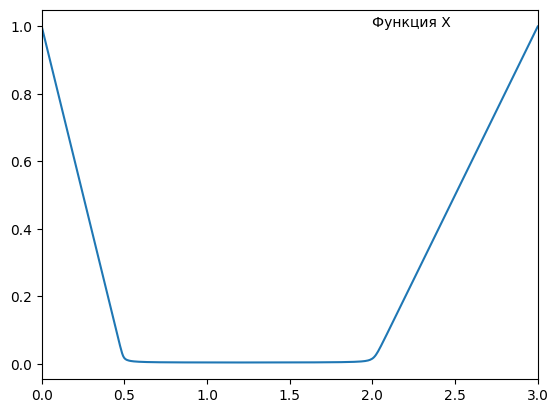

In [96]:
plt.plot(t, x)
plt.xlim([0,3])
plt.text(2.0 ,1.0, 'Функция X')

Text(2.0, 2.0, 'Функция Y')

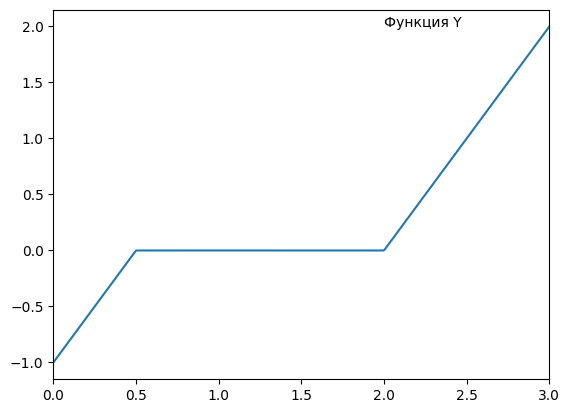

In [97]:
plt.plot(t,y)
plt.xlim([0,3])
plt.text(2.0 ,2.0, 'Функция Y')

Text(0.5, 1.0, 'Функция U')

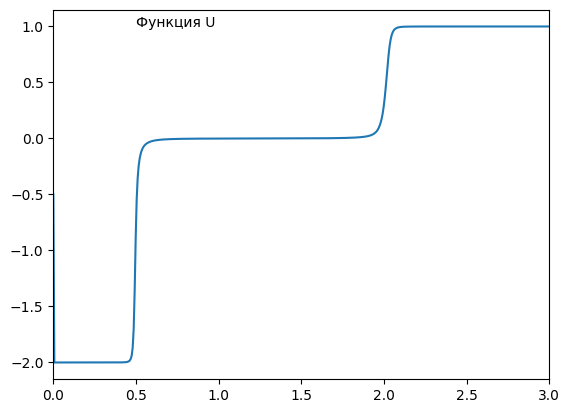

In [98]:
plt.plot(t,u)
plt.xlim([0,3])
plt.text(0.5 ,1.0, 'Функция U')

Text(1.0, 2.0, 'Функция V')

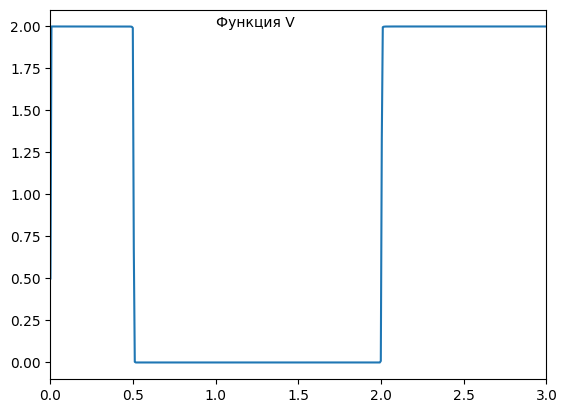

In [99]:
plt.plot(t,v)
plt.xlim([0,3])
plt.text(1.0 ,2.0, 'Функция V')

Text(0.5, 1.5, 'Функция X, синий-МПГ, оранжевый-IPOPT')

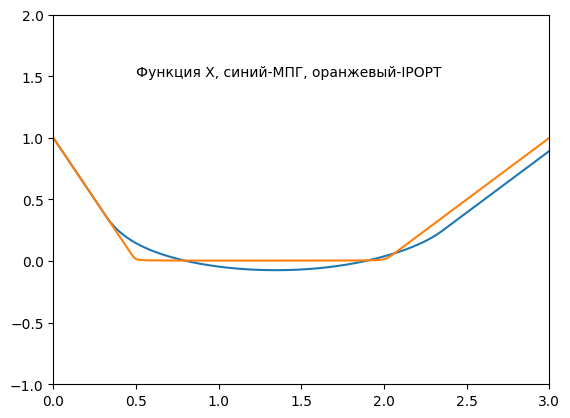

In [100]:
X=[]
T=np.linspace(0.0, tf, 501)
f1 = open('/content/prX.txt', 'r')
for i in f1:
    X.append(float(i.strip()))
f1.close()
plt.xlim([0,3])
plt.ylim([-1,2])
plt.plot(T,X)
plt.plot(t, x)
plt.text(0.5 ,1.5, 'Функция X, синий-МПГ, оранжевый-IPOPT')

Text(0.5, 2.5, 'Функция Y, синий-МПГ, оранжевый-IPOPT')

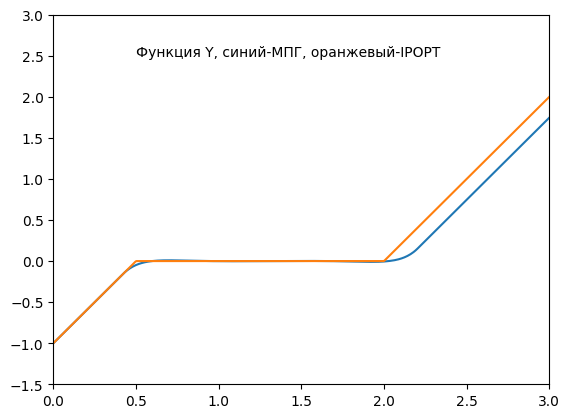

In [101]:
Y=[]
f1 = open('/content/prY.txt', 'r')
for i in f1:
    Y.append(float(i.strip()))
f1.close()
plt.xlim([0,3])
plt.ylim([-1.5,3])
plt.plot(T,Y)
plt.plot(t, y)
plt.text(0.5 ,2.5, 'Функция Y, синий-МПГ, оранжевый-IPOPT')

Text(0.5, 1.5, 'Функция U, синий-МПГ, оранжевый-IPOPT')

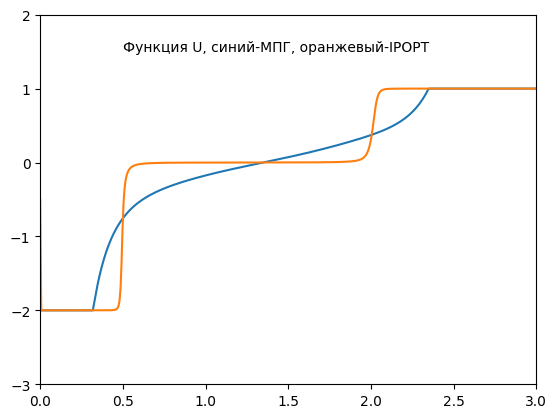

In [102]:
U=[]
f1 = open('/content/prU.txt', 'r')
for i in f1:
    U.append(float(i.strip()))
f1.close()
plt.xlim([0,3])
plt.ylim([-3,2])
plt.plot(T,U)
plt.plot(t, u)
plt.text(0.5 ,1.5, 'Функция U, синий-МПГ, оранжевый-IPOPT')

Text(0.5, 2.5, 'Функция V, синий-МПГ, оранжевый-IPOPT')

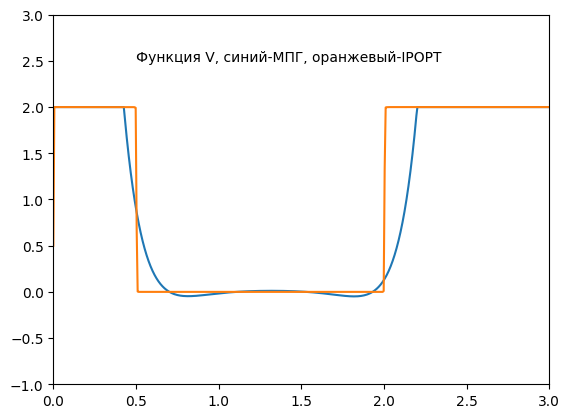

In [103]:
V=[]
f1 = open('/content/prV.txt', 'r')
for i in f1:
    V.append(float(i.strip()))
f1.close()
plt.xlim([0,3])
plt.ylim([-1,3])
plt.plot(T,V)
plt.plot(t, v)
plt.text(0.5 ,2.5, 'Функция V, синий-МПГ, оранжевый-IPOPT')

In [104]:
f1 = open('/content/answer.txt', 'w')
f1.write(f'{tim} - время  \n{res}   -  результат   \n')
f1.close()
